In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iitg-ai-overnight-hackathon-2024/sample_submission.csv
/kaggle/input/iitg-ai-overnight-hackathon-2024/helper.py
/kaggle/input/iitg-ai-overnight-hackathon-2024/dataset/dataset/labels/437/frame67508_gtFine_labellevel3Ids.png
/kaggle/input/iitg-ai-overnight-hackathon-2024/dataset/dataset/labels/437/frame16835_gtFine_polygons.json
/kaggle/input/iitg-ai-overnight-hackathon-2024/dataset/dataset/labels/437/frame63544_gtFine_labellevel3Ids.png
/kaggle/input/iitg-ai-overnight-hackathon-2024/dataset/dataset/labels/437/frame61453_gtFine_labellevel3Ids.png
/kaggle/input/iitg-ai-overnight-hackathon-2024/dataset/dataset/labels/437/frame44071_gtFine_polygons.json
/kaggle/input/iitg-ai-overnight-hackathon-2024/dataset/dataset/labels/437/frame0419_gtFine_polygons.json
/kaggle/input/iitg-ai-overnight-hackathon-2024/dataset/dataset/labels/437/frame23762_gtFine_polygons.json
/kaggle/input/iitg-ai-overnight-hackathon-2024/dataset/dataset/labels/437/frame0419_gtFine_labelColors.png
/kaggle/inp

In [28]:
pip install segmentation-models-pytorch

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import pandas as pd

# Path to the dataset directories
train_dir = '/kaggle/input/iitg-ai-overnight-hackathon-2024/dataset/dataset/train'
labels_dir = '/kaggle/input/iitg-ai-overnight-hackathon-2024/dataset/dataset/labels'

# Initialize lists to store the image and corresponding json paths
image_paths = []
json_paths = []

# Iterate over each folder (201 to 579) in both train and labels directories
for folder_num in range(201, 580):  # Folder numbers from 201 to 579
    train_folder_path = os.path.join(train_dir, str(folder_num))
    labels_folder_path = os.path.join(labels_dir, str(folder_num))
    
    # Check if both the train and labels folders exist
    if os.path.exists(train_folder_path) and os.path.exists(labels_folder_path):
        # Get all .jpg files in the train folder
        for img_file in os.listdir(train_folder_path):
            if img_file.endswith('.jpg'):
                # Base name of the file (without extension and suffix)
                base_filename = img_file.split('_leftImg8bit')[0]
                
                # Construct the full image path
                img_path = os.path.join(train_folder_path, img_file)
                
                # Find the corresponding .json file in the labels folder
                json_file = base_filename + '_gtFine_polygons.json'
                json_path = os.path.join(labels_folder_path, json_file)
                
                # Check if the corresponding .json file exists
                if os.path.exists(json_path):
                    # Append both paths to their respective lists
                    image_paths.append(img_path)
                    json_paths.append(json_path)
                else:
                    print(f"Warning: JSON file not found for {img_file}")

# Create a DataFrame with image and json columns
df = pd.DataFrame({
    'image': image_paths,
    'json': json_paths
})

# Display the first few rows of the dataframe to check
print(df.head())

# If you want to save the dataframe to a CSV file
df.to_csv('image_json_mapping.csv', index=True)

                                               image  \
0  /kaggle/input/iitg-ai-overnight-hackathon-2024...   
1  /kaggle/input/iitg-ai-overnight-hackathon-2024...   
2  /kaggle/input/iitg-ai-overnight-hackathon-2024...   
3  /kaggle/input/iitg-ai-overnight-hackathon-2024...   
4  /kaggle/input/iitg-ai-overnight-hackathon-2024...   

                                                json  
0  /kaggle/input/iitg-ai-overnight-hackathon-2024...  
1  /kaggle/input/iitg-ai-overnight-hackathon-2024...  
2  /kaggle/input/iitg-ai-overnight-hackathon-2024...  
3  /kaggle/input/iitg-ai-overnight-hackathon-2024...  
4  /kaggle/input/iitg-ai-overnight-hackathon-2024...  


In [5]:
df.shape

(7034, 2)

In [6]:
import json
import numpy as np

# Function to return unique labels from all JSON files in the dataframe
def return_unique_labels(df):
    labels_list = []  # List to store all the labels found in the JSON files

    # Iterate over each row in the dataframe, specifically the json column
    for json_file_path in df['json']:
        try:
            # Open the JSON file and load its contents
            with open(json_file_path, 'r') as f:
                json_data = json.load(f)

            # Iterate over the 'objects' in the JSON data to extract the labels
            for obj in json_data['objects']:
                labels_list.append(obj['label'])

        except Exception as e:
            print(f"Error reading {json_file_path}: {e}")
            continue

    # Get the unique labels by converting the list to a numpy array and finding unique elements
    unique_labels = np.unique(np.array(labels_list))

    return unique_labels

# Example usage
unique_labels = return_unique_labels(df)
print("Unique Labels:", unique_labels)

Unique Labels: ['animal' 'autorickshaw' 'bicycle' 'billboard' 'bridge' 'building' 'bus'
 'car' 'caravan' 'curb' 'drivable fallback' 'ego vehicle'
 'fallback background' 'fence' 'ground' 'guard rail' 'license plate'
 'motorcycle' 'non-drivable fallback' 'obs-str-bar-fallback' 'out of roi'
 'parking' 'person' 'pole' 'polegroup' 'rail track' 'rectification border'
 'rider' 'road' 'sidewalk' 'sky' 'traffic light' 'traffic sign' 'trailer'
 'train' 'truck' 'tunnel' 'unlabeled' 'vegetation' 'vehicle fallback'
 'wall']


In [7]:
label_clr = {
 'animal': 10, 'autorickshaw': 20, 'bicycle': 30, 'billboard': 40, 'bridge': 50, 'building': 60, 'bus': 70,
 'car': 80, 'caravan': 90, 'curb': 100, 'drivable fallback': 110, 'ego vehicle': 120, 'fallback background': 130,
 'fence': 140, 'ground': 150, 'guard rail': 160, 'license plate': 170, 'motorcycle': 180, 'non-drivable fallback': 190,
 'obs-str-bar-fallback': 200, 'out of roi': 210, 'parking': 220, 'person': 230, 'pole': 240, 'polegroup': 250,
 'rail track': 260, 'rectification border': 270, 'rider': 280, 'road': 290, 'sidewalk': 300, 'sky': 310,
 'traffic light': 320, 'traffic sign': 330, 'trailer': 340, 'train': 350, 'truck': 360, 'tunnel': 370,
 'unlabeled': 380, 'vegetation': 390, 'vehicle fallback': 400, 'wall': 410
}

In [8]:
def get_poly(file):
    # this function will take a file name as argument
    
    # it will process all the objects in that file and returns
    
    # label: a list of labels for all the objects label[i] will have the corresponding vertices in vertexlist[i]
    # len(label) == number of objects in the image
    
    # vertexlist: it should be list of list of vertices in tuple formate 
    # ex: [[(x11,y11), (x12,y12), (x13,y13) .. (x1n,y1n)]
    #     [(x21,y21), (x22,y12), (x23,y23) .. (x2n,y2n)]
    #      .....
    #     [(xm1,ym1), (xm2,ym2), (xm3,ym3) .. (xmn,ymn)]]
    # len(vertexlist) == number of objects in the image
    
    # * note that label[i] and vertextlist[i] are corresponds to the same object, one represents the type of the object
    # the other represents the location
    
    # width of the image
    # height of the image
    label = []
    vertexlist = []

    with open(file,) as f:
      json_data = json.load(f)
      w = json_data['imgWidth']
      h = json_data['imgHeight']
      for obj in json_data['objects']:
        label.append(obj['label'])
        polygon = [tuple(p) for p in obj['polygon']]
        vertexlist.append(polygon)

    return w, h, label, vertexlist

In [9]:
import pathlib
import os
import pandas as pd
from PIL import Image, ImageDraw
import numpy as np

# Function to compute masks from JSON data and save them as image files
def compute_masks(data_df, label_clr, root_dir=''):
    """
    Compute and save segmentation masks for each JSON file in the dataframe.
    
    Args:
    data_df (DataFrame): DataFrame containing paths to JSON files in the 'json' column.
    label_clr (dict): Dictionary mapping label names to color values for the masks.
    root_dir (str): Directory to save the generated masks (default is current directory).
    
    Returns:
    DataFrame: The updated dataframe with an additional 'mask' column containing paths to the saved masks.
    """
    mask_list = []  # List to store paths to the generated mask images

    # Iterate through each JSON file path in the dataframe
    for row in data_df.json:
        # Get image width, height, labels, and vertices from the JSON file
        w, h, label, vertexlist = get_poly(row)
        
        # Create a new blank image (mask) with the same dimensions as the image
        img = Image.new("RGB", (w, h))
        img1 = ImageDraw.Draw(img)

        # Draw polygons for each object in the image using the vertices and labels
        for i in range(len(label)):
            if len(vertexlist[i]) > 1:  # Ensure valid polygons
                img1.polygon(vertexlist[i], fill=label_clr.get(label[i], 0))  # Use the color from label_clr, default to 0 if not found
        
        # Convert the image to numpy array and extract the first channel (grayscale mask)
        img = np.array(img)
        im = Image.fromarray(img[:, :, 0])  # Convert the mask to a single-channel image

        # Create the output directory if it doesn't exist
        jsonpath = pathlib.PurePath(row)  # Extract the PurePath from the file path
        output_dir = os.path.join(root_dir, 'output', jsonpath.parent.name)
        pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)
        
        # Define the file path where the mask will be saved
        maskpath = os.path.join(output_dir, jsonpath.stem + '.png')
        mask_list.append(maskpath)
        
        # Save the generated mask as a PNG file
        im.save(maskpath)

    # Add the generated mask paths to the DataFrame in a new column 'mask'
    data_df['mask'] = mask_list
    
    return data_df

# Example Usage:
# Assuming you have a 'json' column in your dataframe containing paths to the JSON files
# and label_clr is a dictionary mapping labels to their respective colors
root_dir = '/kaggle/working'  # Adjust as needed for your environment

# Assuming data_df is your dataframe with a column named 'json' that holds JSON file paths
data_df = compute_masks(df, label_clr, root_dir=root_dir)

# Display the dataframe with the new 'mask' column
print(data_df.head())

                                               image  \
0  /kaggle/input/iitg-ai-overnight-hackathon-2024...   
1  /kaggle/input/iitg-ai-overnight-hackathon-2024...   
2  /kaggle/input/iitg-ai-overnight-hackathon-2024...   
3  /kaggle/input/iitg-ai-overnight-hackathon-2024...   
4  /kaggle/input/iitg-ai-overnight-hackathon-2024...   

                                                json  \
0  /kaggle/input/iitg-ai-overnight-hackathon-2024...   
1  /kaggle/input/iitg-ai-overnight-hackathon-2024...   
2  /kaggle/input/iitg-ai-overnight-hackathon-2024...   
3  /kaggle/input/iitg-ai-overnight-hackathon-2024...   
4  /kaggle/input/iitg-ai-overnight-hackathon-2024...   

                                                mask  
0  /kaggle/working/output/201/frame0299_gtFine_po...  
1  /kaggle/working/output/201/frame0029_gtFine_po...  
2  /kaggle/working/output/201/frame3749_gtFine_po...  
3  /kaggle/working/output/201/frame3179_gtFine_po...  
4  /kaggle/working/output/201/frame1469_gtFine_po..

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data_df, test_size=0.2, random_state=42)

In [11]:
print(X_train.shape," ",X_test.shape)

(5627, 3)   (1407, 3)


In [12]:
import segmentation_models_pytorch as smp
import torch

# Define U-Net with an EfficientNet backbone (e.g., EfficientNet-B0)
model = smp.Unet(
    encoder_name="resnet34",          # Backbone: ResNet34
    encoder_weights="imagenet",       # Pre-trained on ImageNet
    in_channels=3,                    # Input channels (RGB)
    classes=40,                       # Number of output classes (for multi-class segmentation)
    activation="softmax"              # Use softmax for multi-class segmentation
)

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Freeze the encoder if required (like encoder_freeze=True in Keras)
for param in model.encoder.parameters():
    param.requires_grad = False

# Print the model summary
print(model)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 195MB/s] 


Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [13]:
pip install albumentations

Note: you may need to restart the kernel to use updated packages.


In [19]:
import torch
import torchvision.transforms as T
from PIL import Image, ImageFilter
import random

class RandomHorizontalFlip:
    """Flip the image horizontally with probability p=1."""
    def _call_(self, img):
        return img.transpose(Image.FLIP_LEFT_RIGHT)

class RandomVerticalFlip:
    """Flip the image vertically with probability p=1."""
    def _call_(self, img):
        return img.transpose(Image.FLIP_TOP_BOTTOM)

class RandomEmboss:
    """Apply emboss effect to the image."""
    def _init_(self, alpha=1, strength=1):
        self.alpha = alpha
        self.strength = strength

    def _call_(self, img):
        # Apply the emboss filter from PIL
        return img.filter(ImageFilter.EMBOSS)

class Sharpen:
    """Sharpen the image."""
    def _init_(self, alpha=1.0, lightness=1.5):
        self.alpha = alpha
        self.lightness = lightness

    def _call_(self, img):
        # Apply the sharpen filter from PIL
        return img.filter(ImageFilter.SHARPEN)

# Compose transformations
transform = T.Compose([
    RandomHorizontalFlip(),
    RandomVerticalFlip(),
    RandomEmboss(),
    Sharpen()
])

In [24]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import cv2
import random

# Custom Dataset Class
class CustomDataset(Dataset):
    CLASSES = list(range(40))  # Modify according to your data/problem

    def _init_(self, df, classes, transform=None):
        """
        Args:
            df (pd.DataFrame): Dataframe containing image and mask file paths.
            classes (list): List of class labels for segmentation.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.df = df
        self.images_fps = df['image'].tolist()  # List of image file paths
        self.masks_fps = df['mask'].tolist()    # List of mask file paths
        self.class_values = [self.CLASSES.index(cls) for cls in classes]  # Class labels
        self.transform = transform

    def _len_(self):
        return len(self.df)

    # CustomDataset's _getitem_ method
class CustomDataset(Dataset):
    CLASSES = list(range(40))  # 40 classes

    def _getitem_(self, idx):
        """
        Fetches the image and corresponding mask at the specified index.
        """
        # Read the image and mask using OpenCV
        image = cv2.imread(self.images_fps[idx], cv2.IMREAD_UNCHANGED)
        mask = cv2.imread(self.masks_fps[idx], cv2.IMREAD_UNCHANGED)

        # Resize the image and mask to the same shape (512, 512)
        image = cv2.resize(image, (512, 512), interpolation=cv2.INTER_NEAREST)
        mask = cv2.resize(mask, (512, 512), interpolation=cv2.INTER_NEAREST)

        # Convert image to a tensor and add a channel dimension for grayscale images
        image = torch.tensor(image).unsqueeze(0).float()  # Grayscale image (1, H, W)

        # Clip the mask values to be in the valid range (0 to 39)
        mask = torch.tensor(mask).unsqueeze(0).long()  # Convert to tensor and add channel dimension (1, H, W)
        mask = torch.clamp(mask, min=0, max=39)  # Ensure values are between 0 and 39

        # One-hot encode the mask
        mask = torch.nn.functional.one_hot(mask, num_classes=41).float()  # One-hot encoding (H, W, 40)

        return image, mask






# Custom DataLoader
class CustomDataLoader(DataLoader):
    def _init_(self, dataset, batch_size=1, shuffle=False):
        """
        Args:
            dataset (Dataset): Instance of the dataset class.
            batch_size (int, optional): Size of each batch. Default is 1.
            shuffle (bool, optional): Whether to shuffle the data. Default is False.
        """
        super()._init_(dataset, batch_size=batch_size, shuffle=shuffle)

    def _iter_(self):
        for batch in super()._iter_():
            yield batch

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim

# Custom Focal Loss Implementation
class FocalLoss(nn.Module):
    def _init_(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self)._init_()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        BCE_loss = nn.functional.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss

        if self.reduction == 'mean':
            return F_loss.mean()
        elif self.reduction == 'sum':
            return F_loss.sum()
        else:
            return F_loss

# Dice Loss Implementation
class DiceLoss(nn.Module):
    def _init_(self, smooth=1):
        super(DiceLoss, self)._init_()
        self.smooth = smooth

    def forward(self, inputs, targets):
        # Apply sigmoid to the inputs
        inputs = torch.sigmoid(inputs)
        
        # Flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        
        # Compute Dice coefficient
        intersection = (inputs * targets).sum()
        dice = (2. * intersection + self.smooth) / (inputs.sum() + targets.sum() + self.smooth)
        
        return 1 - dice

# Combined Focal + Dice Loss
class CombinedLoss(nn.Module):
    def _init_(self, alpha=1, gamma=2, smooth=1):
        super(CombinedLoss, self)._init_()
        self.focal_loss = FocalLoss(alpha=alpha, gamma=gamma)
        self.dice_loss = DiceLoss(smooth=smooth)

    def forward(self, inputs, targets):
        focal = self.focal_loss(inputs, targets)
        dice = self.dice_loss(inputs, targets)
        return focal + dice

# IoU Metric Implementation
def iou_score(preds, targets, threshold=0.5, eps=1e-6):
    preds = torch.sigmoid(preds) > threshold
    preds = preds.float()
    targets = targets.float()

    intersection = (preds * targets).sum()
    union = (preds + targets).sum() - intersection
    iou = (intersection + eps) / (union + eps)

    return iou

# Model, optimizer, and loss function  # Replace with your model
optimizer = optim.Adam(model.parameters(), lr=0.0001, eps=1e-8)  # Equivalent to clipvalue in TensorFlow
loss_fn = CombinedLoss()

In [32]:
import cv2
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    CLASSES = list(range(40))  # 40 classes, 0 to 39

    def __init__(self, df, classes=None, transform=None):
        """
        Args:
            df (pd.DataFrame): DataFrame containing image and mask file paths.
            classes (list): List of class labels for segmentation (optional).
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.df = df
        self.images_fps = df['image'].tolist()  # List of image file paths
        self.masks_fps = df['mask'].tolist()    # List of mask file paths
        self.class_values = [self.CLASSES.index(cls) for cls in (classes or self.CLASSES)]
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Read the image and mask
        image = cv2.imread(self.images_fps[idx], cv2.IMREAD_COLOR)  # Ensure it's read in color (RGB)
        mask = cv2.imread(self.masks_fps[idx], cv2.IMREAD_UNCHANGED)

        # Resize both image and mask to 512x512
        image = cv2.resize(image, (512, 512), interpolation=cv2.INTER_NEAREST)
        mask = cv2.resize(mask, (512, 512), interpolation=cv2.INTER_NEAREST)

        # Convert image to tensor and ensure it has 3 channels (C, H, W)
        image = torch.tensor(image).permute(2, 0, 1).float()  # Rearrange to (C, H, W)

        # Convert mask to tensor and clamp values between 0 and 39
        mask = torch.tensor(mask).long()
        mask = torch.clamp(mask, min=0, max=39)

        # One-hot encode the mask with num_classes=40 and permute to (C, H, W)
        mask = torch.nn.functional.one_hot(mask, num_classes=40).permute(2, 0, 1).float()  # Ensure shape is (C, H, W)

        return image, mask


from torch.utils.data import DataLoader

# Define dataset and data loader
CLASSES = list(range(39))  # 40 classes for multi-class segmentation

# Assuming X_train and X_test are your pandas DataFrames containing 'image' and 'mask' columns
train_dataset = CustomDataset(X_train, classes=CLASSES)  # Use the previously defined CustomDataset class
test_dataset = CustomDataset(X_test, classes=CLASSES)

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=True)

# Example to check the shape of an image and mask from the dataloader
sample_image, sample_mask = next(iter(train_dataloader))
print(sample_image.shape)  # Expected: torch.Size([2, 1, 512, 512]) for grayscale images (batch_size, channels, height, width)
print(sample_mask.shape)   # Expected: torch.Size([2, 40, 512, 512]) for one-hot encoded masks (batch_size, num_classes, height, width)

torch.Size([2, 3, 512, 512])
torch.Size([2, 40, 512, 512])


In [33]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [34]:
import torch
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm  # For progress bar

# Define optimizer, scheduler, and criterion (loss function)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, min_lr=0.000001, verbose=True)
criterion = CombinedLoss()  # Assuming you have defined this custom loss function

# The rest of your training code remains the same...

In [ ]:
import torch
import torch.optim as optim
from tqdm import tqdm  # For progress bar

import torch
import torch.nn as nn

class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-6):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, outputs, targets):
        outputs = torch.sigmoid(outputs)  # Ensure the outputs are in the range (0, 1)
        targets = targets.float()         # Ensure targets are float for calculations
        
        intersection = (outputs * targets).sum()
        dice_score = (2. * intersection + self.smooth) / (outputs.sum() + targets.sum() + self.smooth)
        return 1 - dice_score  # We return 1 - dice_score to minimize the loss


def save_checkpoint(model, epoch, val_loss, path):
    """
    Saves the model checkpoint to the specified path.
    
    Args:
        model (torch.nn.Module): The model to be saved.
        epoch (int): The epoch number.
        val_loss (float): The validation loss for this checkpoint.
        path (str): The file path where to save the checkpoint.
    """
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'val_loss': val_loss,
    }
    torch.save(checkpoint, path)
    print(f"Checkpoint saved at {path}")

# Set up optimizer, scheduler, and criterion (loss function)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, min_lr=0.000001, verbose=True)
criterion = DiceLoss()  # Use the custom loss function (focal + dice loss)

# Move model to the appropriate device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training function
def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, targets in tqdm(dataloader, desc="Training", leave=False):
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(dataloader)
    return epoch_loss

# Validation function
def validate_one_epoch(model, dataloader, criterion, device):
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    iou_score_sum = 0.0
    with torch.no_grad():
        for inputs, targets in tqdm(dataloader, desc="Validation", leave=False):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            running_loss += loss.item()
            iou_score_sum += iou_score(outputs, targets).item()
    
    epoch_loss = running_loss / len(dataloader)
    avg_iou_score = iou_score_sum / len(dataloader)
    return epoch_loss, avg_iou_score

# Training and validation loop
num_epochs = 5
best_val_loss = float("inf")

# Define directory for saving checkpoints
log_dir = "./checkpoints"  # Specify your preferred directory here
os.makedirs(log_dir, exist_ok=True)  # Create the directory if it doesn't exist

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    
    # Training step
    train_loss = train_one_epoch(model, train_dataloader, optimizer, criterion, device)
    print(f"Dice Loss: {train_loss:.4f}")
    
    # Validation step
    val_loss, val_iou = validate_one_epoch(model, test_dataloader, criterion, device)
    print(f"Validation Loss: {val_loss:.4f}, Validation IoU: {val_iou:.4f}")
    
    # Step the learning rate scheduler
    scheduler.step(val_loss)
    
    # Save the best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        save_checkpoint(model, epoch, val_loss, os.path.join(log_dir, 'best_model.pth'))
        print("Saved Best Model")

    print("-" * 30)

Epoch 1/5


Training:   7%|▋         | 186/2814 [01:06<16:34,  2.64it/s]

In [38]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import cv2
import random

# Custom Dataset Class
class CustomDataset(Dataset):
    CLASSES = list(range(21))  # Modify according to your data/problem

    def _init_(self, df, classes, transform=None):
        """
        Args:
            df (pd.DataFrame): Dataframe containing image and mask file paths.
            classes (list): List of class labels for segmentation.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.df = df
        self.images_fps = df['image'].tolist()  # List of image file paths
        self.masks_fps = df['mask'].tolist()    # List of mask file paths
        self.class_values = [self.CLASSES.index(cls) for cls in classes]  # Class labels
        self.transform = transform

    def _len_(self):
        return len(self.df)

    # CustomDataset's _getitem_ method
class CustomDataset(Dataset):
    CLASSES = list(range(40))  # 40 classes

    def _getitem_(self, idx):
        """
        Fetches the image and corresponding mask at the specified index.
        """
        # Read the image and mask using OpenCV
        image = cv2.imread(self.images_fps[idx], cv2.IMREAD_UNCHANGED)
        mask = cv2.imread(self.masks_fps[idx], cv2.IMREAD_UNCHANGED)

        # Resize the image and mask to the same shape (512, 512)
        image = cv2.resize(image, (512, 512), interpolation=cv2.INTER_NEAREST)
        mask = cv2.resize(mask, (512, 512), interpolation=cv2.INTER_NEAREST)

        # Convert image to a tensor and add a channel dimension for grayscale images
        image = torch.tensor(image).unsqueeze(0).float()  # Grayscale image (1, H, W)

        # Clip the mask values to be in the valid range (0 to 39)
        mask = torch.tensor(mask).unsqueeze(0).long()  # Convert to tensor and add channel dimension (1, H, W)
        mask = torch.clamp(mask, min=0, max=39)  # Ensure values are between 0 and 39

        # One-hot encode the mask
        mask = torch.nn.functional.one_hot(mask, num_classes=41).float()  # One-hot encoding (H, W, 40)

        return image, mask






# Custom DataLoader
class CustomDataLoader(DataLoader):
    def _init_(self, dataset, batch_size=1, shuffle=False):
        """
        Args:
            dataset (Dataset): Instance of the dataset class.
            batch_size (int, optional): Size of each batch. Default is 1.
            shuffle (bool, optional): Whether to shuffle the data. Default is False.
        """
        super()._init_(dataset, batch_size=batch_size, shuffle=shuffle)

    def _iter_(self):
        for batch in super()._iter_():
            yield batch

In [39]:
# Save the entire model
torch.save(model, "model_1.pth")

NameError: name 'train_iou_scores' is not defined

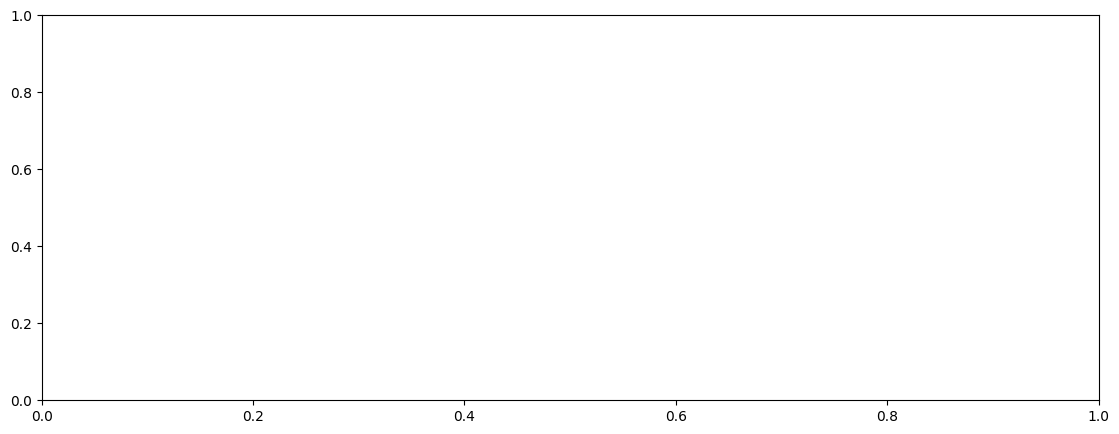

In [40]:
import matplotlib.pyplot as plt

# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))

# IoU Score
plt.subplot(121)
plt.plot(train_iou_scores, label='Train IoU Score')
plt.plot(val_iou_scores, label='Validation IoU Score')
plt.title('Model IoU Score')
plt.ylabel('IoU Score')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss
plt.subplot(122)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

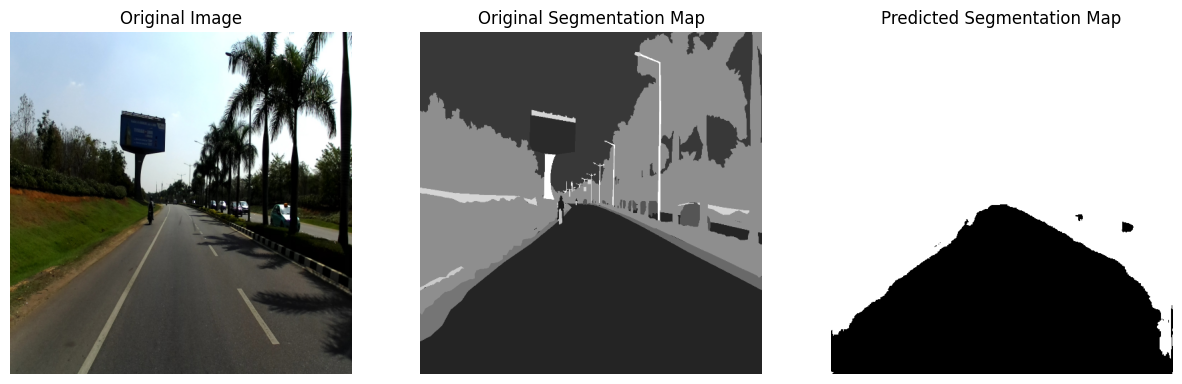

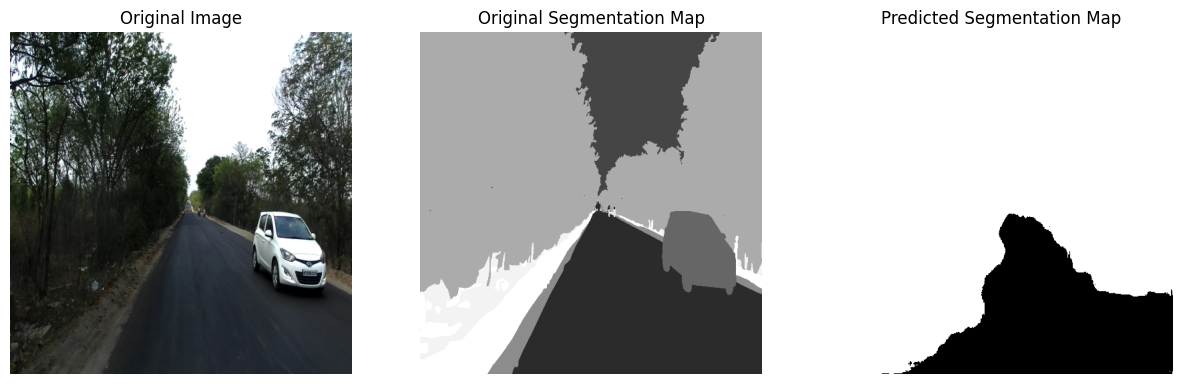

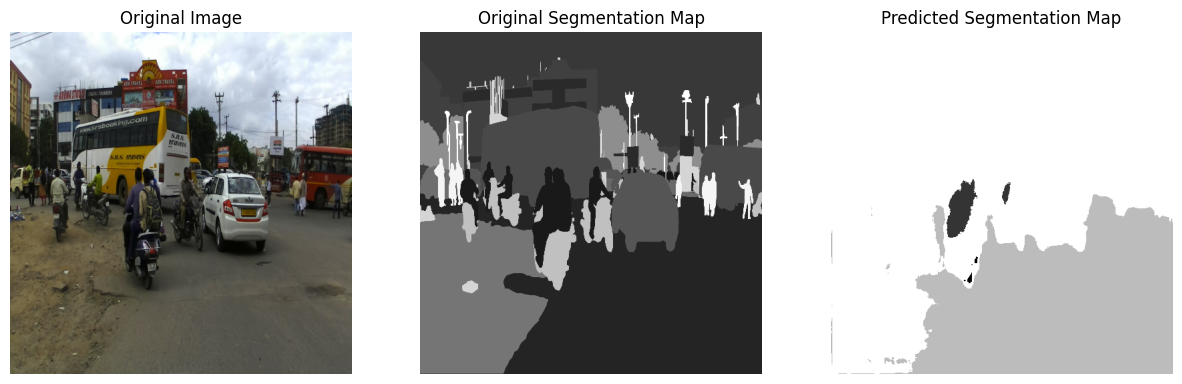

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

# Assuming model is your trained PyTorch model
model.eval()  # Set the model to evaluation mode

for idx, row in enumerate(X_test[:3].values):
    # Original image
    image = cv2.imread(row[0], cv2.IMREAD_UNCHANGED) 
    image = cv2.resize(image, (512, 512), interpolation=cv2.INTER_AREA)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Prepare the image for model input
    image_tensor = torch.tensor(image).permute(2, 0, 1).float()  # Change to (C, H, W)
    image_tensor = image_tensor.unsqueeze(0).to(device)  # Add batch dimension and move to device

    # Predicted segmentation map
    with torch.no_grad():  # No need to track gradients during inference
        predicted_mask = model(image_tensor)
    predicted_mask = torch.argmax(predicted_mask, dim=1).cpu().numpy()  # Get predicted classes and convert to numpy

    # Original segmentation map
    image_mask = cv2.imread(row[2], cv2.IMREAD_UNCHANGED)
    image_mask = cv2.resize(image_mask, (512, 512))

    # Plotting
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(image_mask, cmap='gray')
    plt.title("Original Segmentation Map")
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(predicted_mask[0], cmap='gray')  # Use predicted_mask[0] to access the first image in the batch
    plt.title("Predicted Segmentation Map")
    plt.axis('off')

    plt.show()